 
# Matplotlib 必须掌握的 50 个可视化图表（附完整 Python 源代码）

本文总结了 Matplotlib 以及 Seaborn 用的最多的50个图形，掌握这些图形的绘制，对于数据分析的可视化有莫大的作用，强烈推荐大家阅读后续内容。

如果觉得内容不错，欢迎分享到您的朋友圈。

Tips：

（1）本文原文部分代码有不准确的地方，已进行修改；

（2）所有正确的源代码，我已整合到 jupyter notebook 文件中，可以在公众号『Python数据之道』后台回复 “code”，可获得本文源代码；

（3）运行本文代码，除了安装 matplotlib 和 seaborn 可视化库外，还需要安装其他的一些辅助可视化库，已在代码部分作标注，具体内容请查看下面文章内容。

（4）本文完整的翻译文章来自 http://liyangbit.com/



在数据分析和可视化中最有用的 50 个 Matplotlib 图表。 这些图表列表允许您使用 python 的 matplotlib 和 seaborn 库选择要显示的可视化对象。

## 介绍
这些图表根据可视化目标的7个不同情景进行分组。 例如，如果要想象两个变量之间的关系，请查看“相关”部分下的图表。 或者，如果您想要显示值如何随时间变化，请查看“更改”部分，依此类推。


有效图表的重要特征：

* 在不歪曲事实的情况下传达正确和必要的信息。
* 设计简单，您不必太费力就能理解它。
* 从审美角度支持信息而不是掩盖信息。
* 信息没有超负荷。

## 准备工作

在代码运行前先引入下面的设置内容。 当然，单独的图表，可以重新设置显示要素。

plt设置seaborn的style的可能选项有：bright，colorblind，dark，dark-palette，darkgrid，deep，muted，notebook，paper，pastel，poster，talk，ticks，white，whitegrid

In [5]:
# !pip install brewer2mpl
import numpy as np
from random import randint
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')



large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_style("white")
%matplotlib inline

# 设置中文显示
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体为黑体

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

NameError: name 'matplotlib' is not defined

## 关联 （Correlation）

关联图表用于可视化2个或更多变量之间的关系。 也就是说，一个变量如何相对于另一个变化。



### 散点图（Scatter plot）

散点图是用于研究两个变量之间关系的经典的和基本的图表。 如果数据中有多个组，则可能需要以不同颜色可视化每个组。 在 matplotlib 中，您可以使用 `plt.scatterplot（）` 方便地执行此操作。

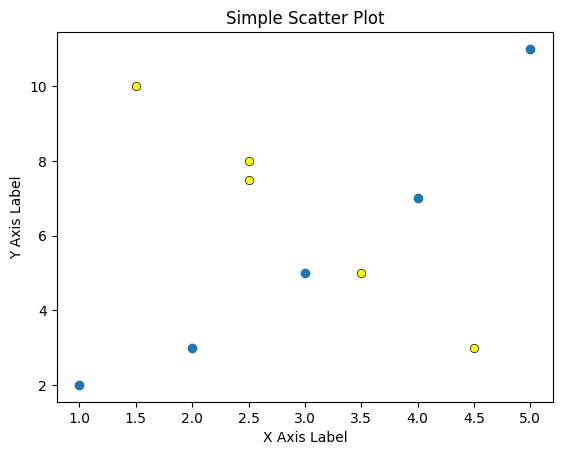

In [3]:
import matplotlib.pyplot as plt

# 示例数据
x1 = [1, 2, 3, 4, 5]
y1 = [2, 3, 5, 7, 11]

x2 = [1.5, 2.5, 2.5, 3.5, 4.5]
y2 = [10, 8, 7.5, 5, 3]

# 创建散点图
plt.scatter(x1, y1)    # 第一组散点
plt.scatter(x2, y2, color="yellow", edgecolors='black', linewidths=.5)    # 第二组散点，外面加黑边
plt.title('Simple Scatter Plot')
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.show()


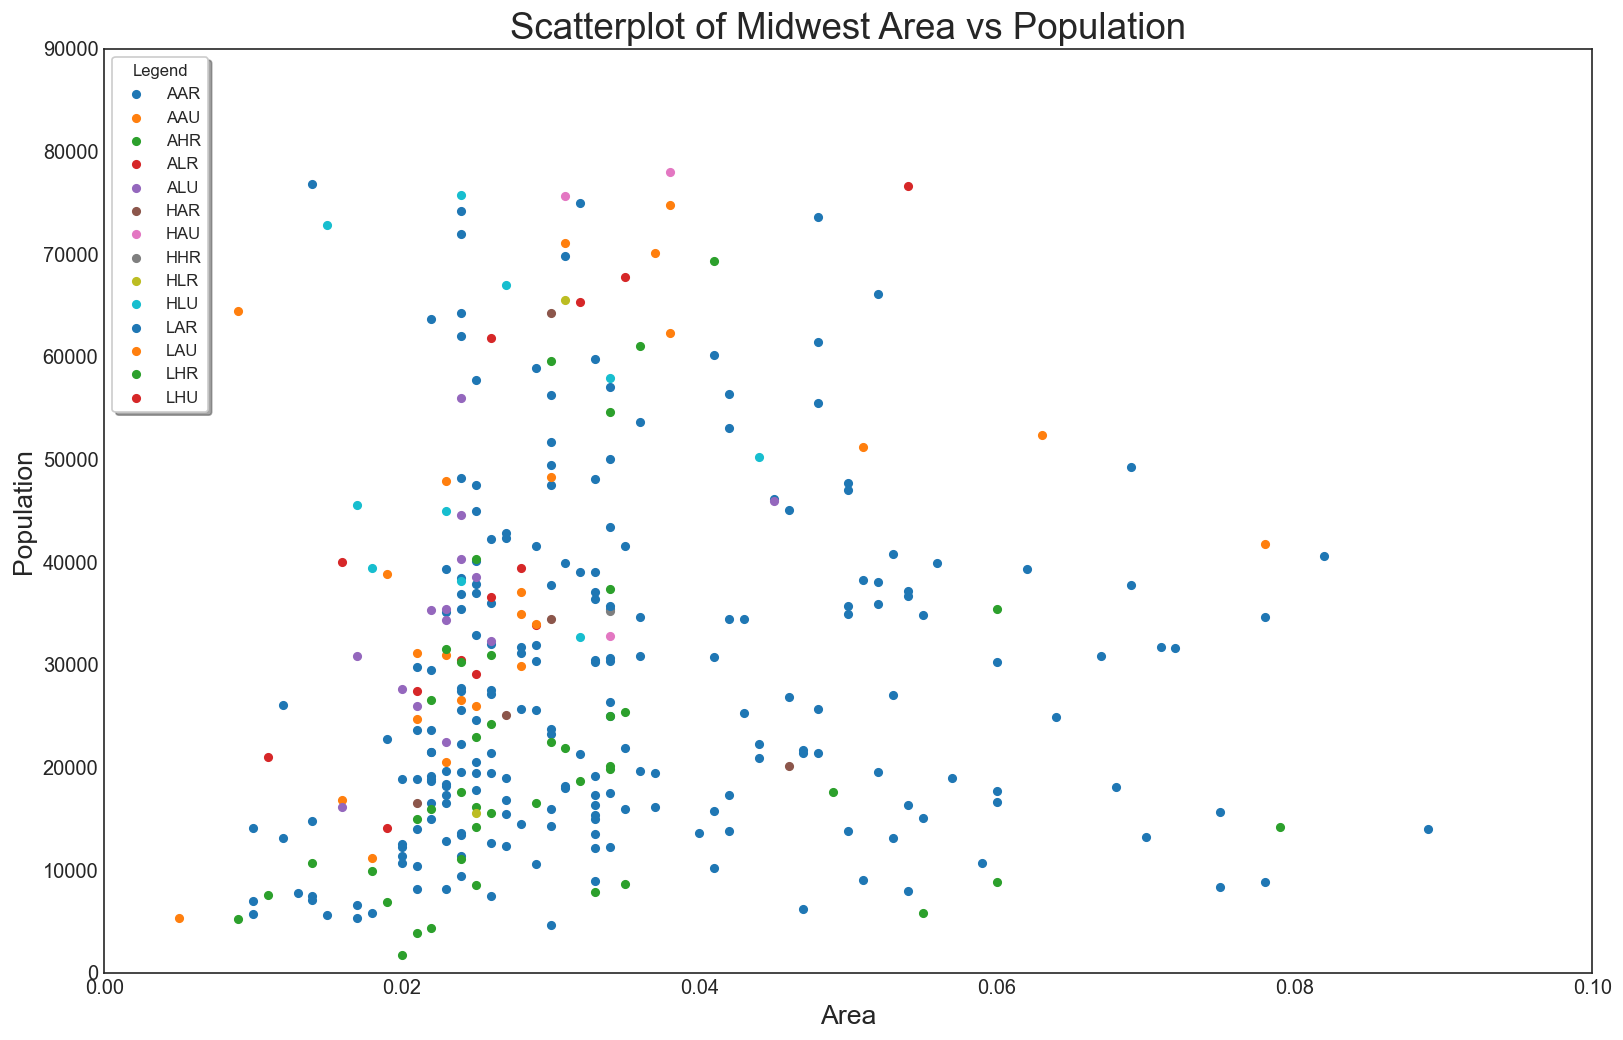

In [52]:
# Import dataset 
midwest = pd.read_csv("Data/midwest_filter.csv")

# Prepare Data 
# Create as many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]    # 使用系统内部设置的颜色

# Draw Plot for Each Category
# figsize表示图表尺寸，单位是英寸（或者填满），dpi是每英寸像素密度。但是因为受到页面缩放的影响，所以这个表现有时不直观。
# facecolor是背景色，edgecolor是边框颜色。frameon表示是否有边框。（好像没效果）
plt.figure(figsize=(16, 10), dpi= 120, facecolor='w', edgecolor='k', frameon=False)

# 图表的Title
plt.title("Scatterplot of Midwest Area vs Population", fontsize=22)
for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', data=midwest.loc[midwest.category==category, :],  s=20,   label=str(category)) # cmap=colors[i]
    # "c=" 修改为 "cmap="，Python数据之道 备注 

# Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000), xlabel='Area', ylabel='Population')

# 横纵轴上面数字的大小
plt.xticks(fontsize=12); plt.yticks(fontsize=12)

# 图表左上标注文字的字体大小,loc表示位置
plt.legend(fontsize=10, loc='upper left',frameon=True, title='Legend',shadow=True)    

plt.show()    

### 带边界的气泡图（Bubble plot with Encircling）

有时，您希望在边界内显示一组点以强调其重要性。 在这个例子中，你从数据框中获取记录，并用下面代码中描述的 `encircle（）` 来使边界显示出来。  
encircle 函数并不是 Python 或 matplotlib 的标准库函数。不过，它通常被用于数据可视化上下文中，特别是在散点图上标记或圈出特定的点群。这个功能在一些自定义的函数或特定的库中可能以 "encircle" 或类似名字存在，用于突出显示或注释数据集中的特定区域或群集。

假设你想在 matplotlib 绘制的散点图中圈出一些点，你可以通过绘制一个多边形或使用 patches 来实现。下面是一个如何使用 matplotlib 的 patches 模块来手动实现 "encircle" 功能的示例。

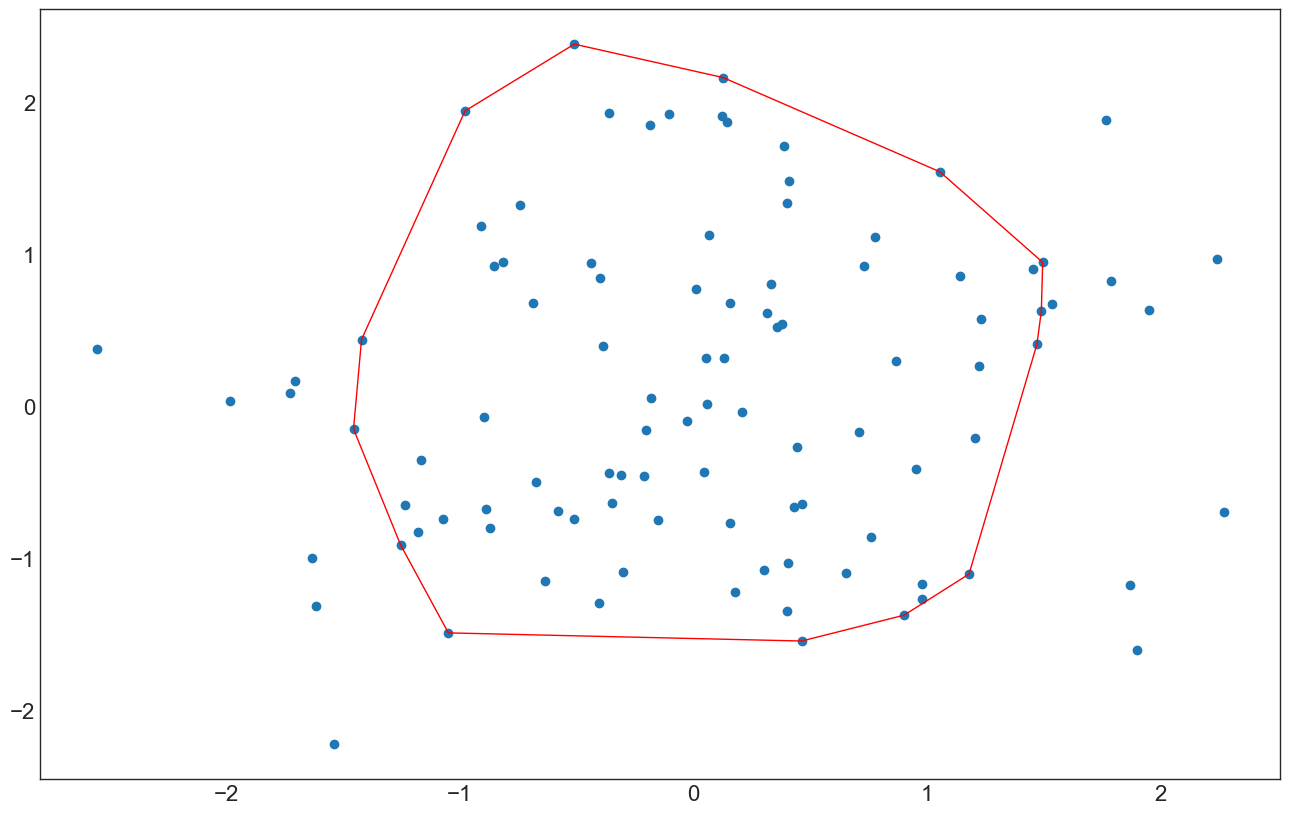

In [6]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

# 生成一些数据
np.random.seed(0)
x = np.random.randn(100)
y = np.random.randn(100)

fig, ax = plt.subplots()

# 绘制散点图
ax.scatter(x, y)

# 假设我们要圈出数据中心附近的点
x_center = x[np.abs(x) < 1.5]
y_center = y[np.abs(x) < 1.5]

# 使用凸包算法找到应该被圈出的点
from scipy.spatial import ConvexHull
points = np.column_stack((x_center, y_center))
hull = ConvexHull(points)
poly = Polygon(points[hull.vertices], closed=True, fill=None, edgecolor='r')
ax.add_patch(poly)

# 显示图形
plt.show()


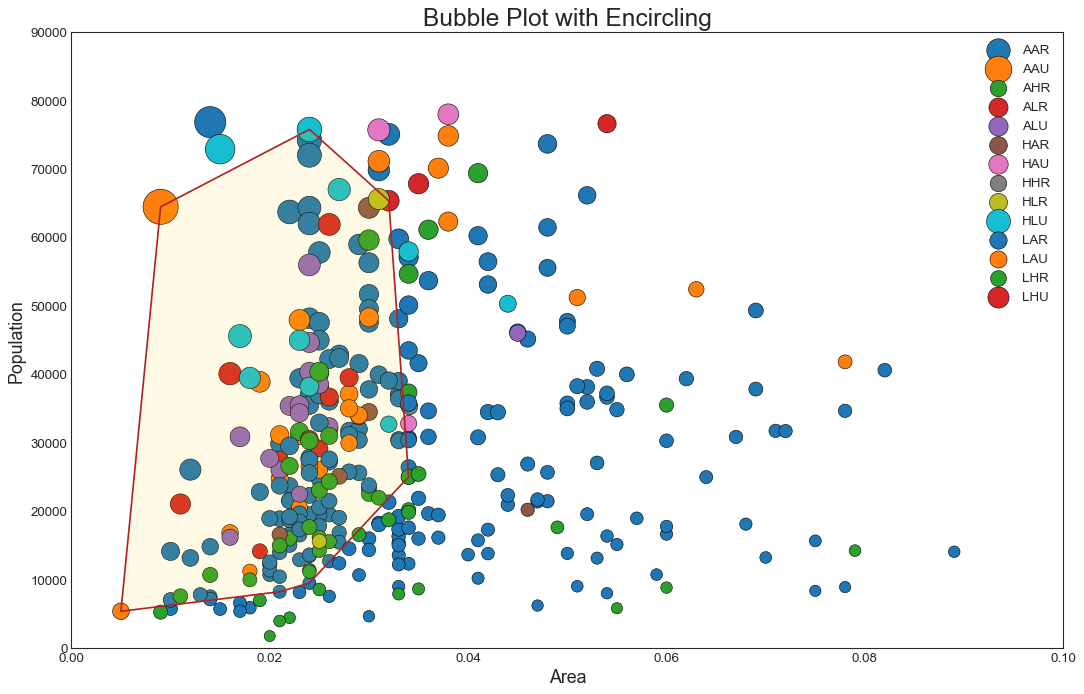

In [55]:
from matplotlib import patches
from scipy.spatial import ConvexHull
import warnings; warnings.simplefilter('ignore')
sns.set_style("white")

# Step 1: Prepare Data
midwest = pd.read_csv("Data/midwest_filter.csv")

# As many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Step 2: Draw Scatterplot with unique color for each category
fig = plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')    

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', data=midwest.loc[midwest.category==category, :], 
                s='dot_size', cmap=colors[i], label=str(category), edgecolors='black', linewidths=.5)
    # "c=" 修改为 "cmap="，Python数据之道 备注 

# Step 3: Encircling
# https://stackoverflow.com/questions/44575681/how-do-i-encircle-different-data-sets-in-scatter-plot
def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

# Select data to be encircled
midwest_encircle_data = midwest.loc[midwest.state=='IN', :]                         

# Draw polygon surrounding vertices    
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="k", fc="gold", alpha=0.1)
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="firebrick", fc="none", linewidth=1.5)

# Step 4: Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Bubble Plot with Encircling", fontsize=22)
plt.legend(fontsize=12)    
plt.show()    

### 带线性回归最佳拟合线的散点图 （Scatter plot with linear regression line of best fit）

如果你想了解两个变量如何相互改变，那么最佳拟合线就是常用的方法。 下图显示了数据中各组之间最佳拟合线的差异。 要禁用分组并仅为整个数据集绘制一条最佳拟合线，请从下面的`sns.lmplot（）`调用中删除`hue ='cyl'`参数。

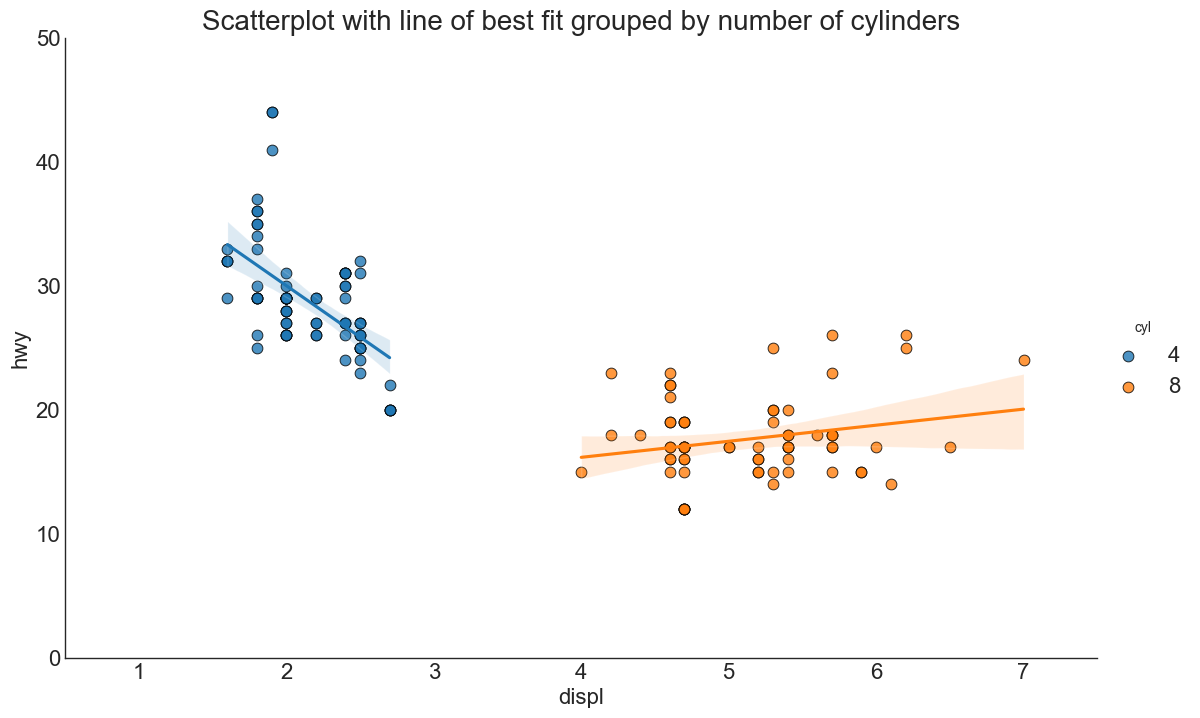

In [58]:
# Import Data
df = pd.read_csv("Data/mpg_ggplot2.csv")
df_select = df.loc[df.cyl.isin([4,8]), :]

# Plot
sns.set_style("white")
gridobj = sns.lmplot(x="displ", y="hwy", hue="cyl", data=df_select, 
                     height=7, aspect=1.6, robust=False, palette='tab10', 
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Decorations
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.title("Scatterplot with line of best fit grouped by number of cylinders", fontsize=20)
plt.show()

**针对每列绘制线性回归线**

或者，可以在其每列中显示每个组的最佳拟合线。 可以通过在 `sns.lmplot()` 中设置 `col=groupingcolumn` 参数来实现，如下：

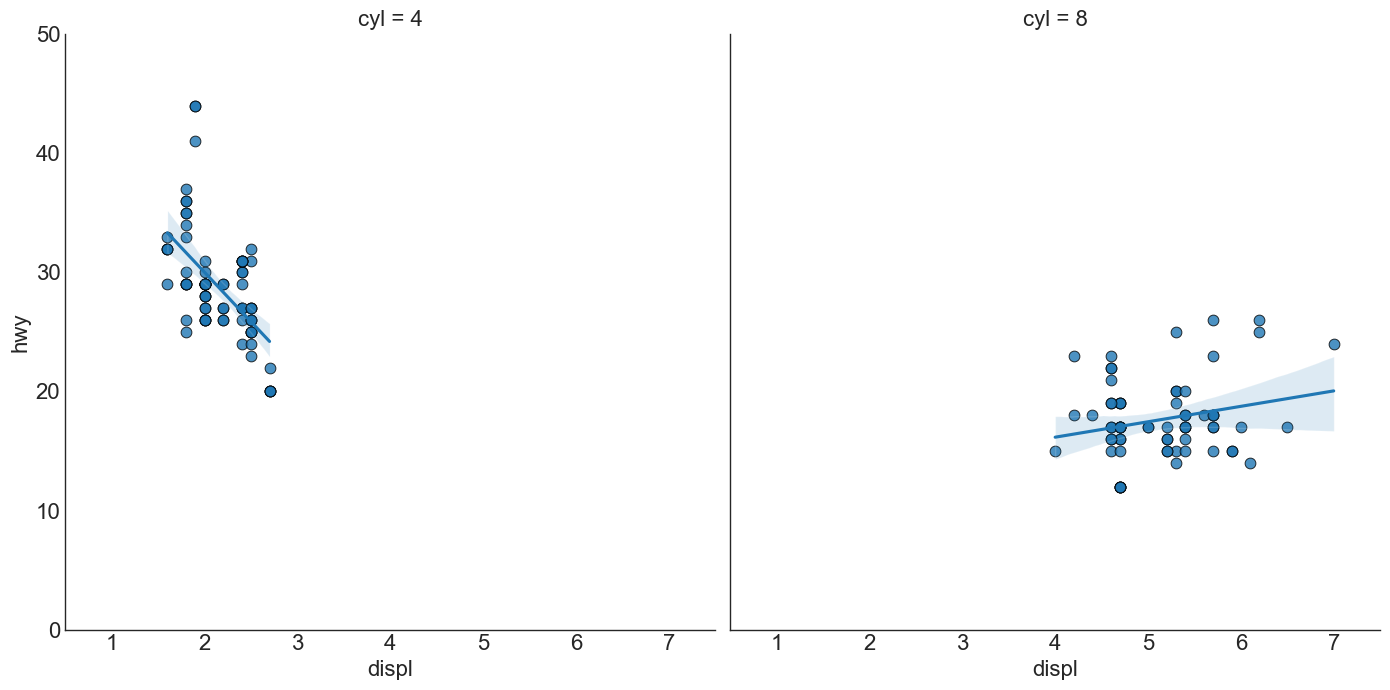

In [60]:
# Import Data
df = pd.read_csv("Data/mpg_ggplot2.csv")
df_select = df.loc[df.cyl.isin([4,8]), :]

# Each line in its own column
sns.set_style("white")
gridobj = sns.lmplot(x="displ", y="hwy", 
                     data=df_select, 
                     height=7, 
                     robust=False, 
                     palette='Set1', 
                     col="cyl",
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Decorations
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.show()

### 抖动图 （Jittering with stripplot）

通常，多个数据点具有完全相同的 X 和 Y 值。 结果，多个点绘制会重叠并隐藏。 为避免这种情况，请将数据点稍微抖动，以便您可以直观地看到它们。 使用 seaborn 的 `stripplot（）` 很方便实现这个功能。

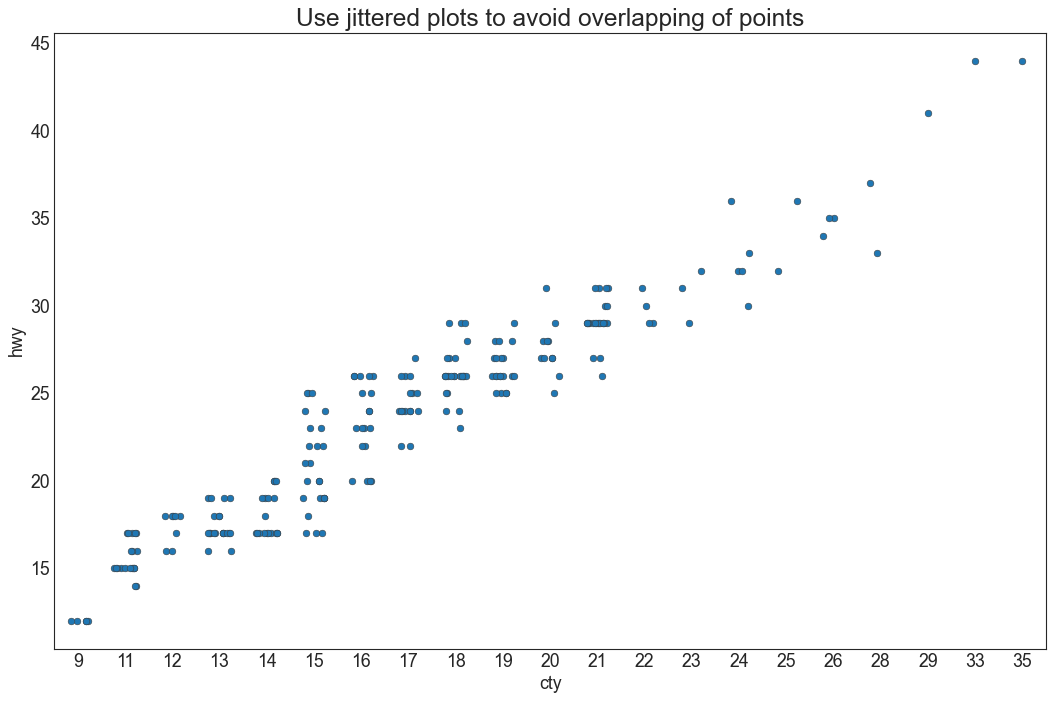

In [67]:
# Import Data
df = pd.read_csv("Data/mpg_ggplot2.csv")

# Draw Stripplot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(x=df.cty, y=df.hwy, jitter=0.25, size=6, ax=ax, linewidth=.5)

# Decorations
plt.title('Use jittered plots to avoid overlapping of points', fontsize=22)
plt.show()

### 计数图 （Counts Plot）

避免点重叠问题的另一个选择是增加点的大小，这取决于该点中有多少点。 因此，点的大小越大，其周围的点的集中度越高。

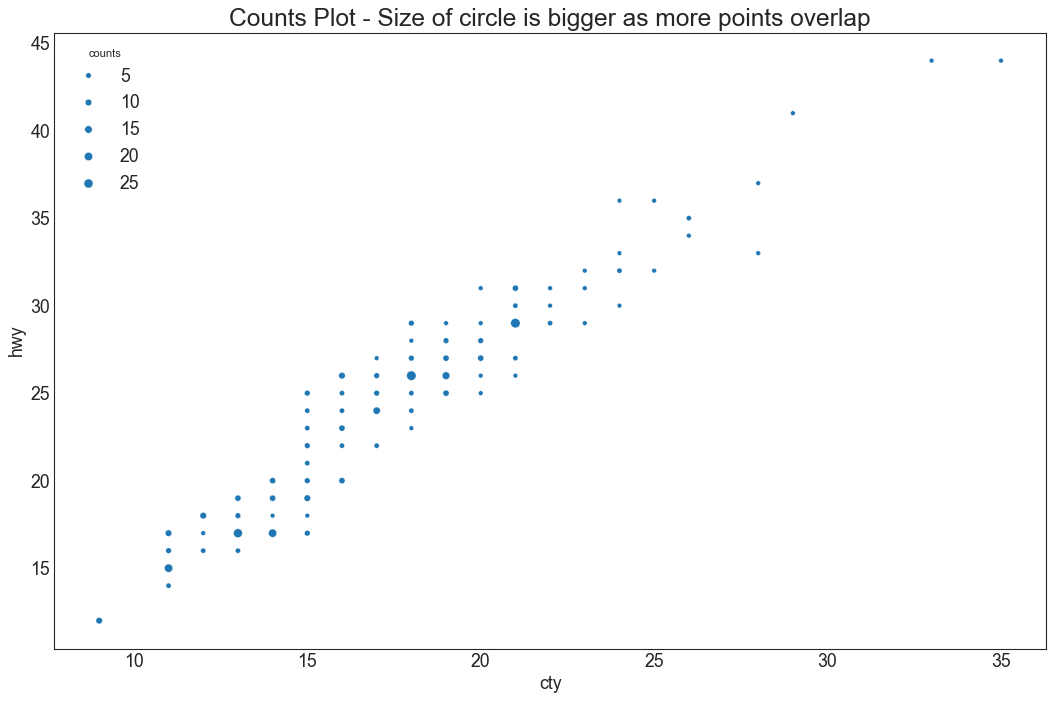

In [73]:
# Import Data
df = pd.read_csv("Data/mpg_ggplot2.csv")
df_counts = df.groupby(['hwy', 'cty']).size().reset_index(name='counts')

# Draw Stripplot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
# 这里通过修改size来实现控制点的大小
sns.scatterplot (x=df_counts.cty, y=df_counts.hwy, size=df_counts.counts*2, ax=ax)

# Decorations
plt.title('Counts Plot - Size of circle is bigger as more points overlap', fontsize=22)
plt.show()

### 边缘直方图 （Marginal Histogram）

边缘直方图具有沿 X 和 Y 轴变量的直方图。 这用于可视化 X 和 Y 之间的关系以及单独的 X 和 Y 的单变量分布。 这种图经常用于探索性数据分析（EDA）。

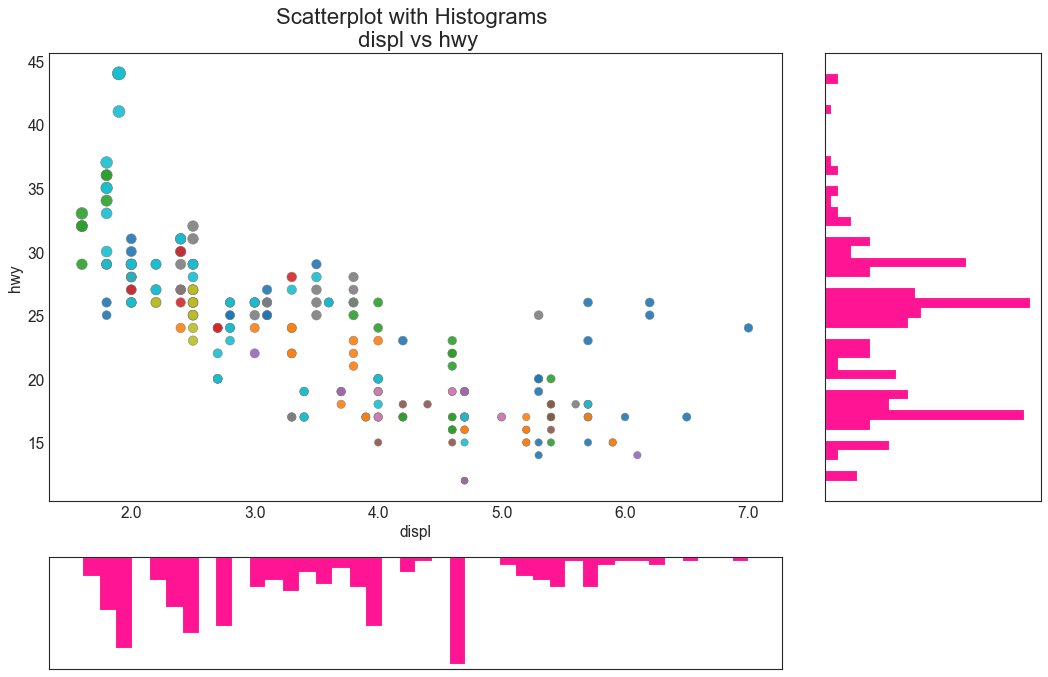

In [74]:
# Import Data
df = pd.read_csv("Data/mpg_ggplot2.csv")

# Create Fig and gridspec
fig = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('displ', 'hwy', s=df.cty*4, c=df.manufacturer.astype('category').cat.codes, alpha=.9, data=df, cmap="tab10", edgecolors='gray', linewidths=.5)

# histogram on the right
ax_bottom.hist(df.displ, 40, histtype='stepfilled', orientation='vertical', color='deeppink')
ax_bottom.invert_yaxis()

# histogram in the bottom
ax_right.hist(df.hwy, 40, histtype='stepfilled', orientation='horizontal', color='deeppink')

# Decorations
ax_main.set(title='Scatterplot with Histograms \n displ vs hwy', xlabel='displ', ylabel='hwy')
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

xlabels = ax_main.get_xticks().tolist()
ax_main.set_xticklabels(xlabels)
plt.show()

### 边缘箱形图 （Marginal Boxplot）

边缘箱图与边缘直方图具有相似的用途。 然而，箱线图有助于精确定位 X 和 Y 的中位数、第25和第75百分位数。

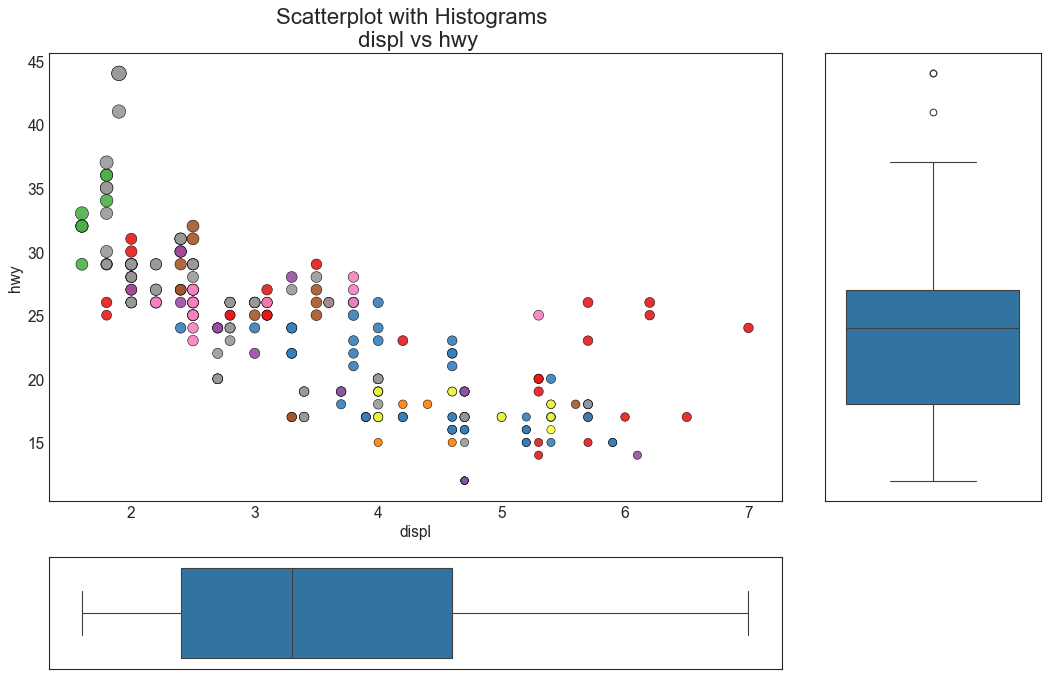

In [75]:
# Import Data
df = pd.read_csv("Data/mpg_ggplot2.csv")

# Create Fig and gridspec
fig = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('displ', 'hwy', s=df.cty*5, c=df.manufacturer.astype('category').cat.codes, alpha=.9, data=df, cmap="Set1", edgecolors='black', linewidths=.5)

# Add a graph in each part
sns.boxplot(df.hwy, ax=ax_right, orient="v")
sns.boxplot(df.displ, ax=ax_bottom, orient="h")

# Decorations ------------------
# Remove x axis name for the boxplot
ax_bottom.set(xlabel='')
ax_right.set(ylabel='')

# Main Title, Xlabel and YLabel
ax_main.set(title='Scatterplot with Histograms \n displ vs hwy', xlabel='displ', ylabel='hwy')

# Set font size of different components
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

plt.show()

### 相关图 （Correllogram）

相关图用于直观地查看给定数据框（或二维数组）中所有可能的数值变量对之间的相关度量。

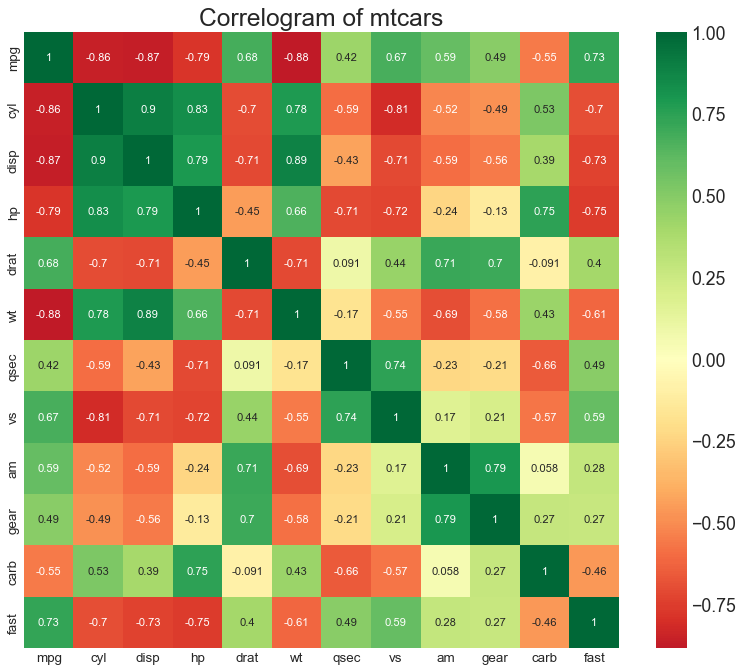

In [76]:
# Import Dataset
df = pd.read_csv("Data/mtcars.csv")

# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### 矩阵图 （Pairwise Plot）

矩阵图是探索性分析中的最爱，用于理解所有可能的数值变量对之间的关系。 它是双变量分析的必备工具。

<Figure size 800x640 with 0 Axes>

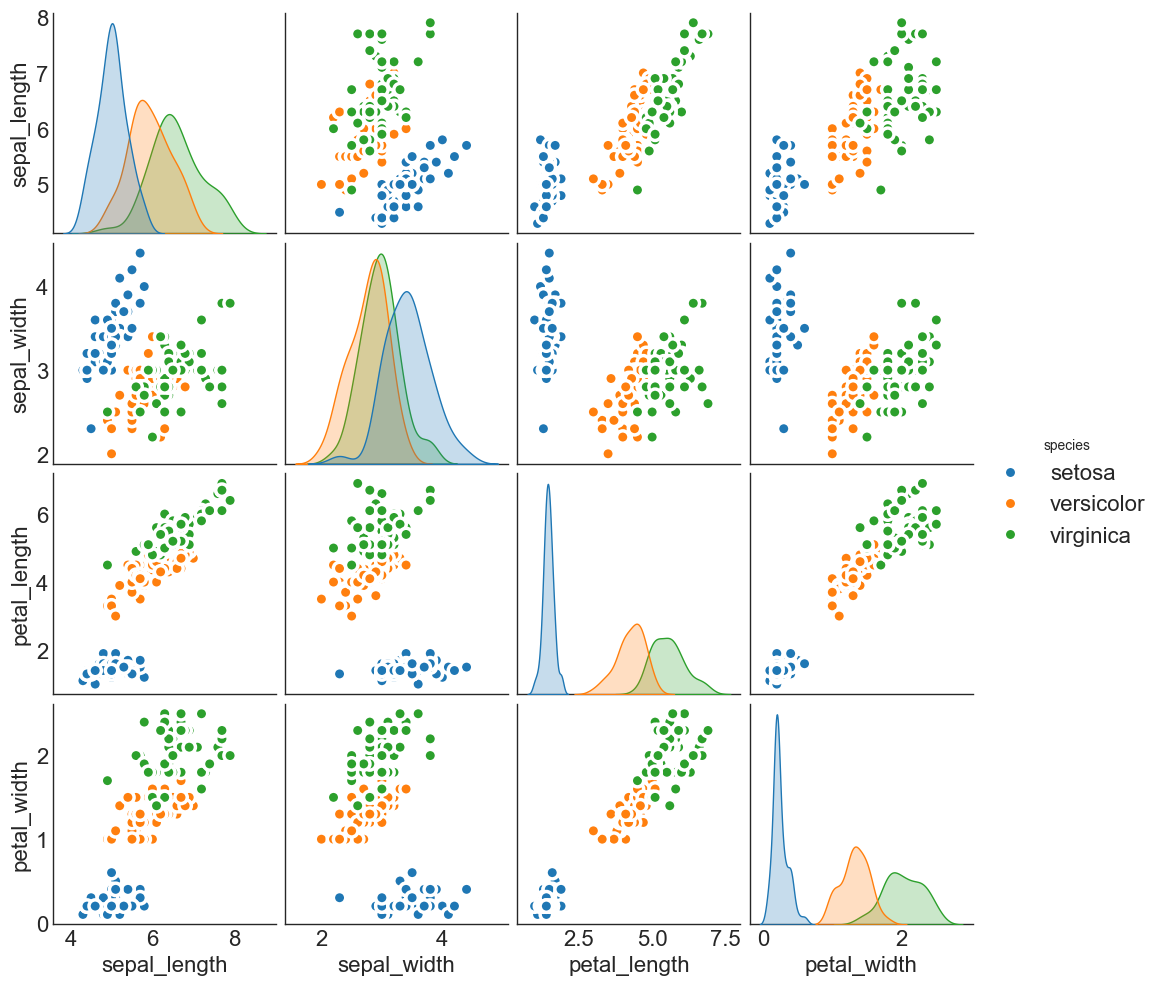

In [77]:
# Load Dataset
df = sns.load_dataset('iris')

# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="scatter", hue="species", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

<Figure size 800x640 with 0 Axes>

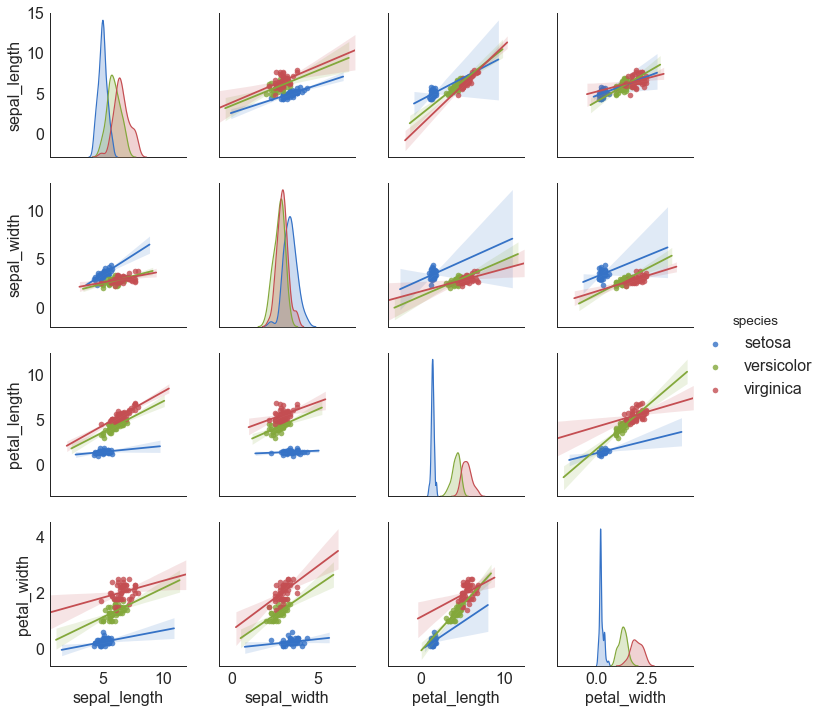

In [12]:
# Load Dataset
df = sns.load_dataset('iris')

# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="reg", hue="species")
plt.show()